In [1]:
"""
Author: rui.humberto.pereira@gmail.com
Date: 2021/Mai/11
Updated: 2021/Mai/12
"""

'\nAuthor: rui.humberto.pereira@gmail.com\nDate: 2021/Mai/11\nUpdated: 2021/Mai/12\n'

In [1]:
#The necessary libs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#include rhplib
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
import rhplib.datasets_pandas

In [2]:
#Desable the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load Pima Indians Diabetes dataset using pandas
dataset = pd.read_csv('../../datasets/PimaIndiansDiabetesDatabase.csv',delimiter=',',header=0)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check the existance of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#Remove the invalid data
dataset=rhplib.datasets_pandas.clean_invalida_data_pima_indian_diabetes_dataset(dataset)

Before:  768
After data cleaning:  391


In [6]:
# Clean the outliers
# Note that when you clean one feature the fences of the others are influenced!
dataset=rhplib.datasets_pandas.clean_iqr_outliers(dataset,'BMI',True)
dataset=rhplib.datasets_pandas.clean_iqr_outliers(dataset,'Glucose',True)
dataset=rhplib.datasets_pandas.clean_iqr_outliers(dataset,'Insulin',True)

Eliminating the outliers of BMI  irq=8.700  [15.350 ... 50.150]
Before:  391
After data cleaning:  385
Eliminating the outliers of Glucose  irq=44.000  [33.000 ... 209.000]
Before:  385
After data cleaning:  385
Eliminating the outliers of Insulin  irq=113.000  [-92.500 ... 359.500]
Before:  385
After data cleaning:  361


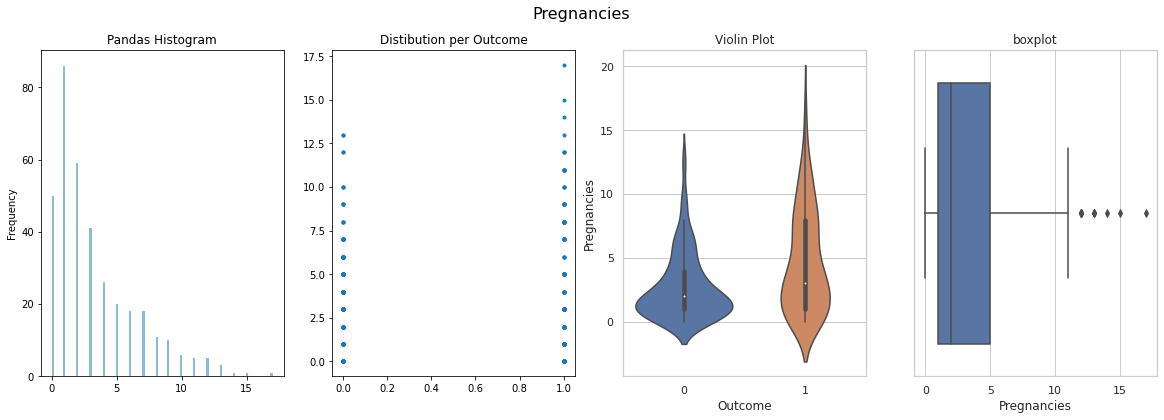

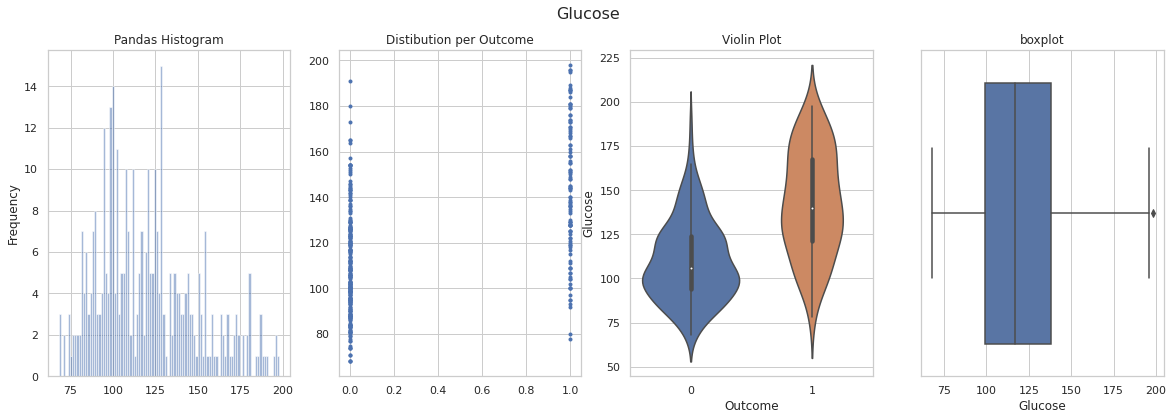

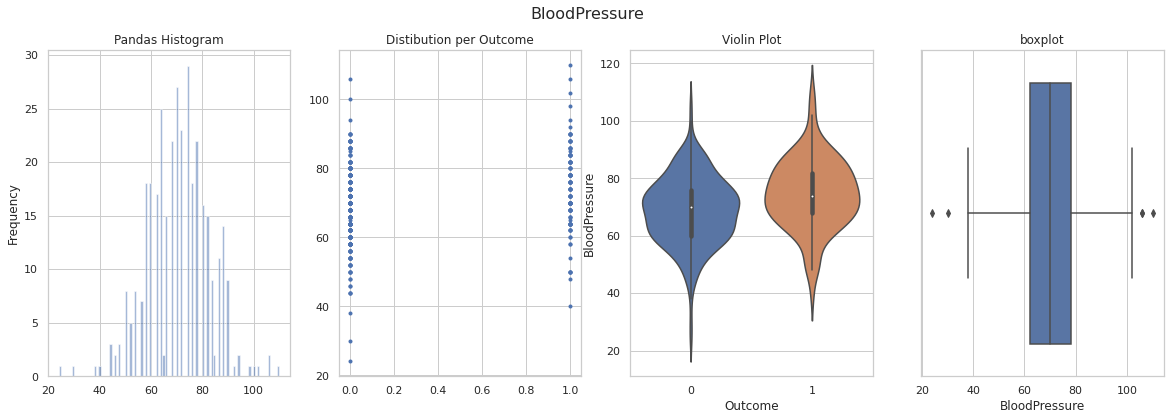

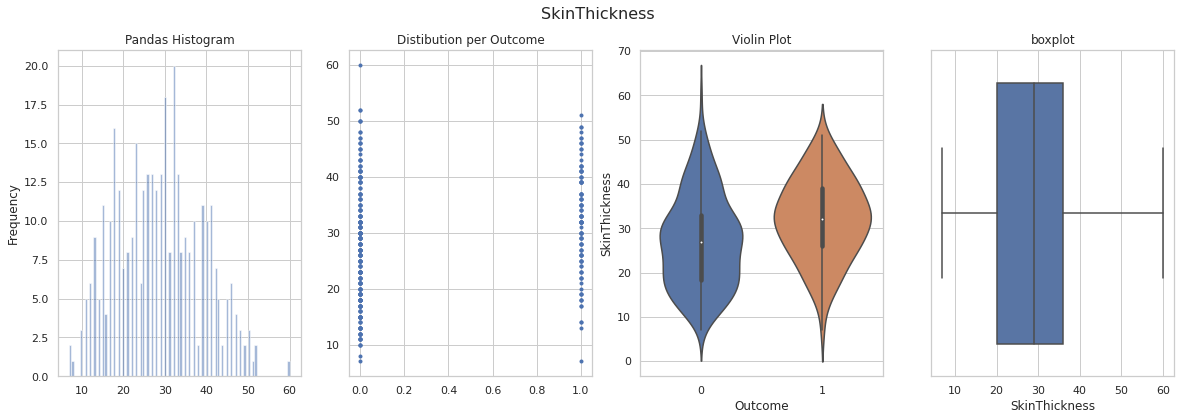

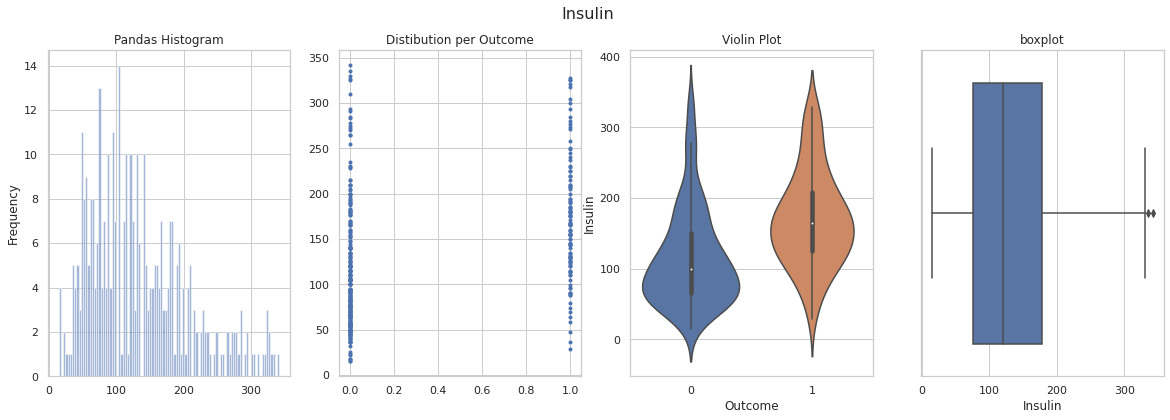

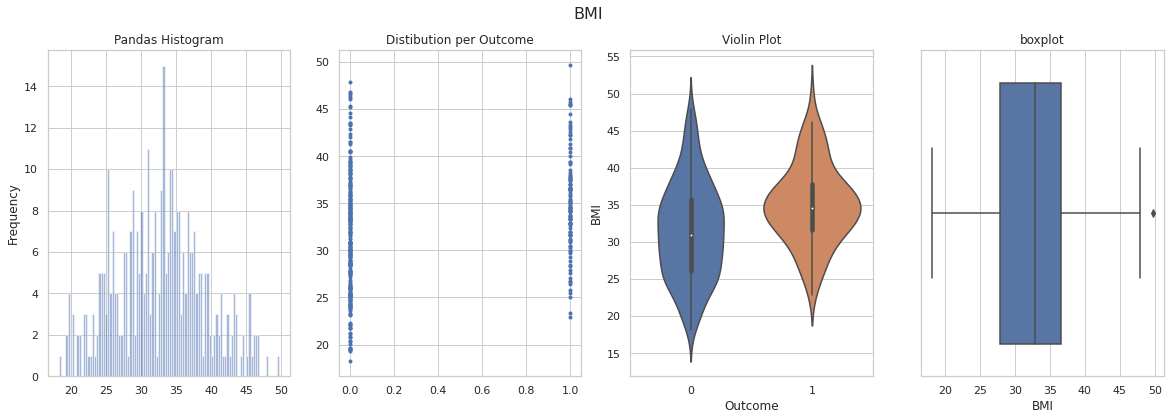

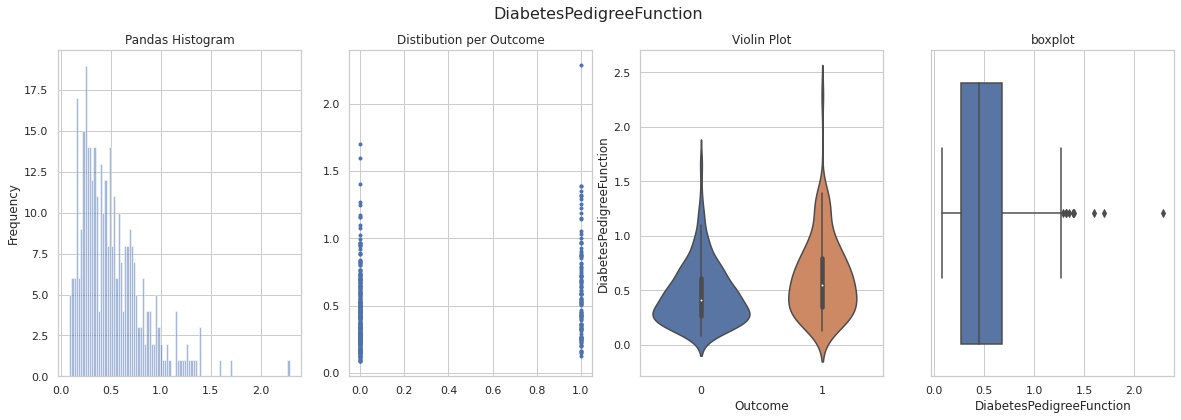

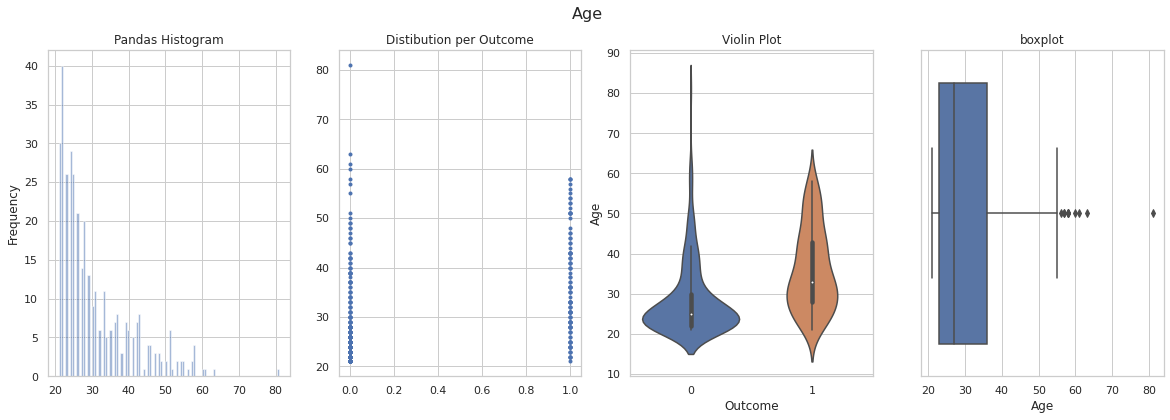

In [7]:
for c in dataset.columns:
    #print(c)
    if c not in ['Outcome']:
        rhplib.datasets_pandas.analysis_graph(dataset,c,'Outcome',c)

total_rows= 361
total_cols= 9


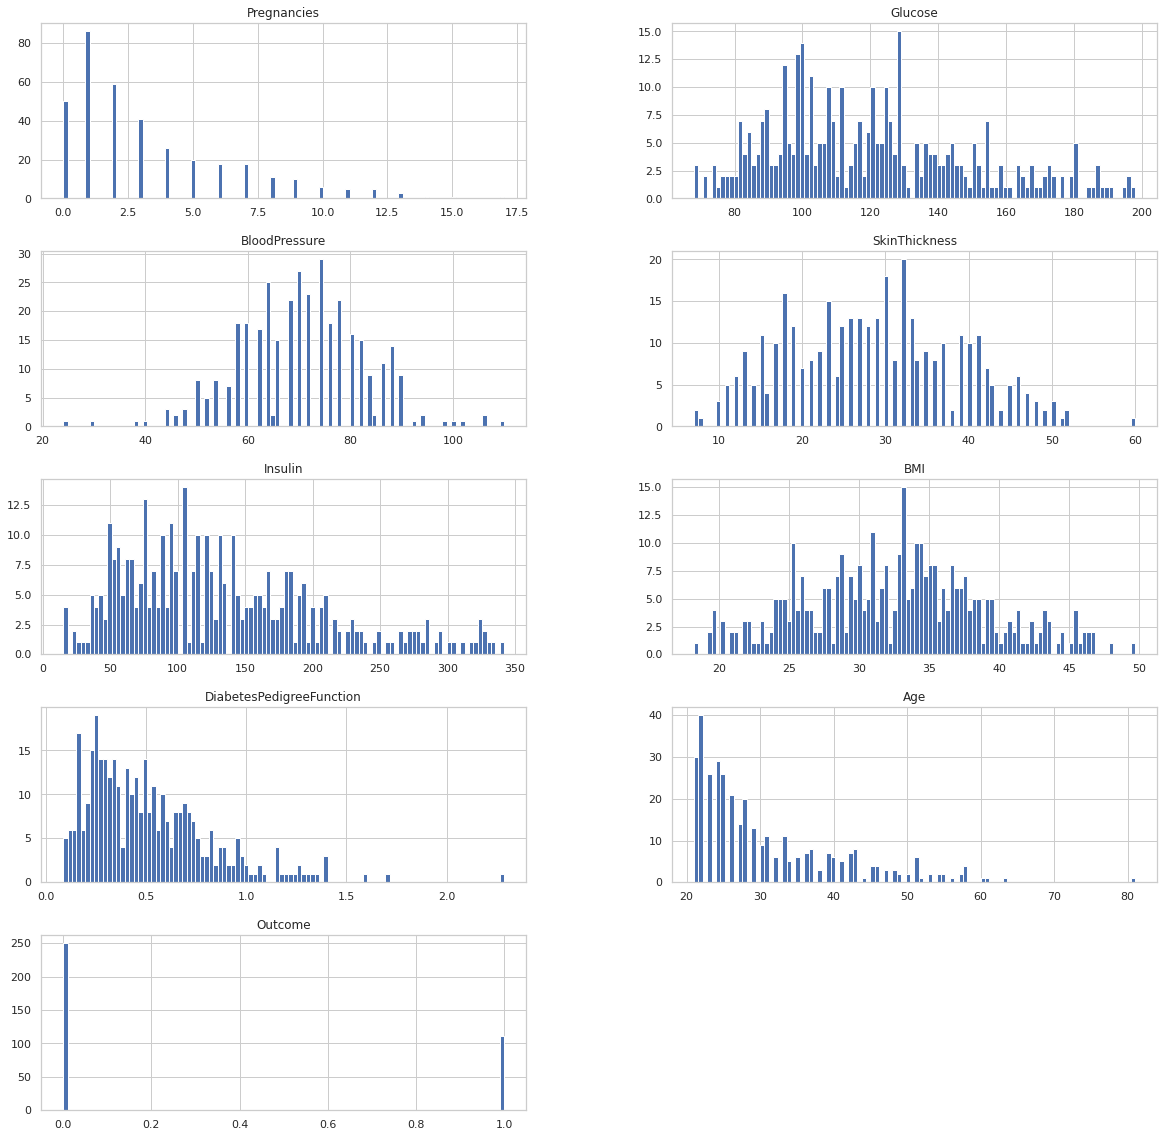

In [8]:
# Histogram of features
rhplib.datasets_pandas.plot_hist_dataset(dataset,100,2,False)

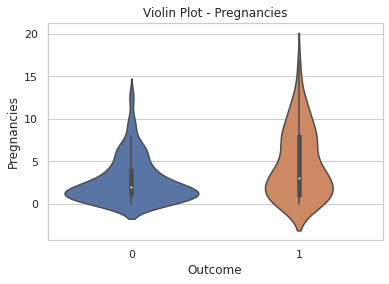

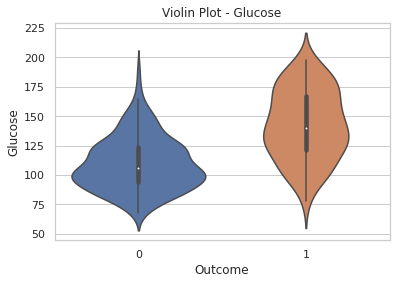

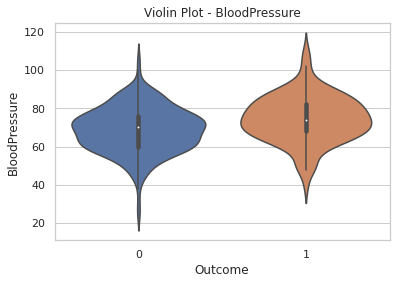

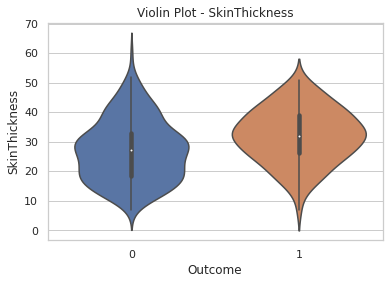

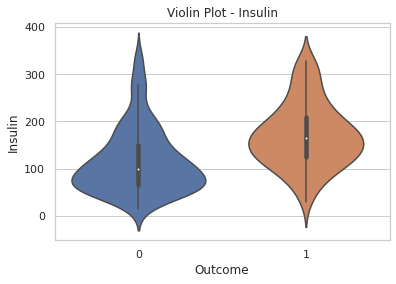

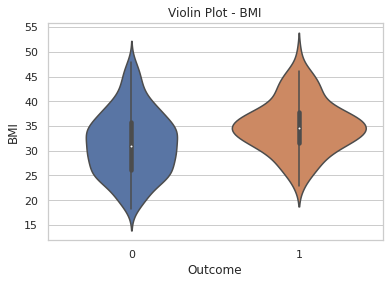

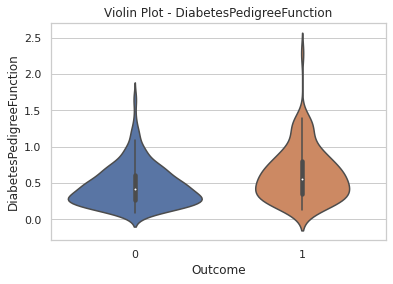

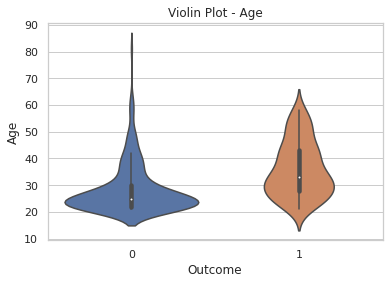

In [8]:
# Violin
sns.set_theme(style="whitegrid")
for c in dataset.columns:
    #print(c)
    if c not in ['Outcome']:
        fig = plt.figure()
        ax = sns.violinplot(y=c,x='Outcome',data=dataset)
        ax.set_title('Violin Plot - '+c)
plt.show()

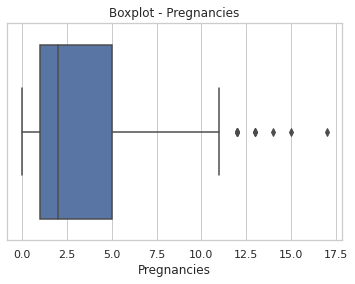

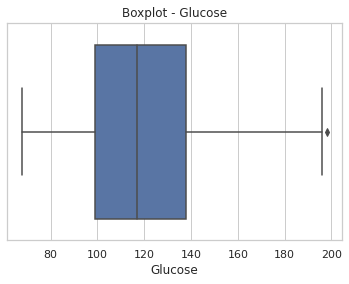

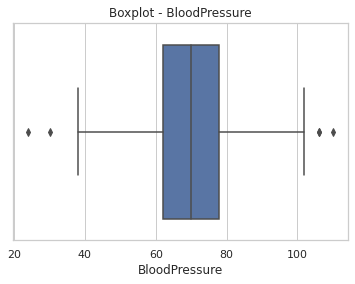

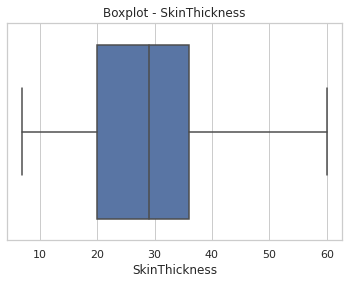

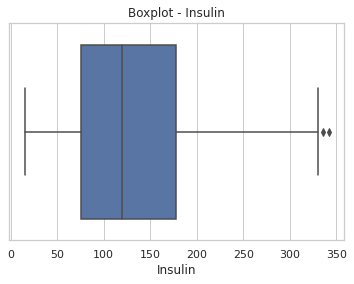

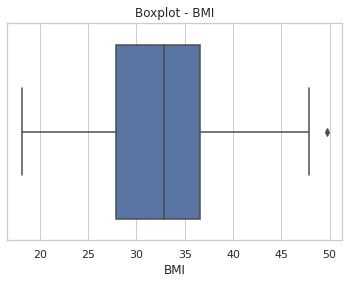

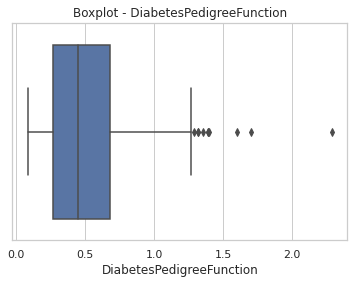

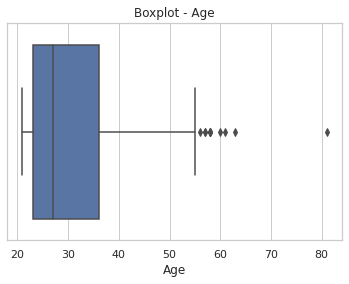

In [9]:
# Boxplot
for c in dataset.columns:
    if c not in ['Outcome']:
        #print(c)
        sns.boxplot(dataset[c])
        plt.title('Boxplot - '+c)
        plt.show()

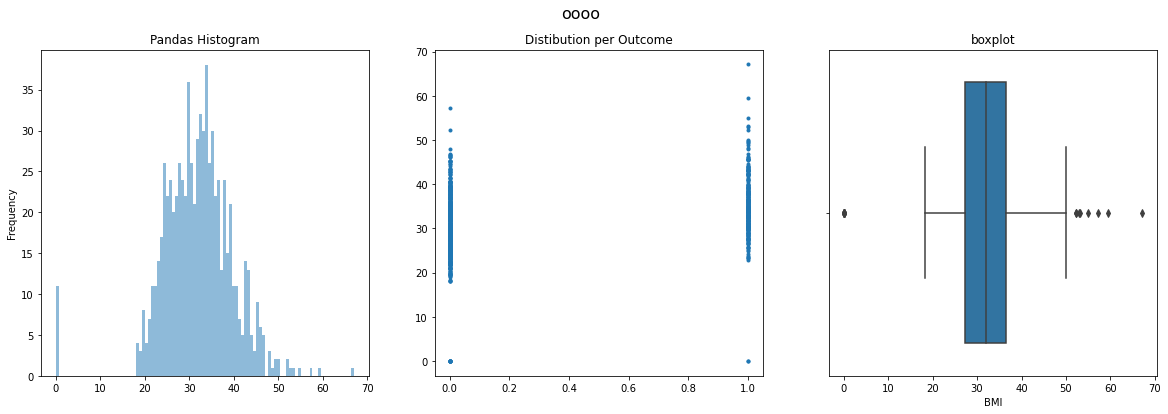